# **Data Loading & Setup**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import logging
import os
import sys

In [2]:
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2025-01-11 16:52:20,498 - INFO - Imported libraries and configured logging.


In [5]:
# Import load_data
from load_data import load_data

if __name__ == "__main__":
    # Define file paths and names
    zip_file_path = '../data/rossmann-store-sales.zip'
    extract_to_folder = '../data'
    train = 'train.csv'
    test = 'test.csv'
    store = 'store.csv'

    # Load the dataset
    try:
        train_data = load_data(zip_file_path, train, extract_to_folder)
        test_data = load_data(zip_file_path, test, extract_to_folder)
        store_data = load_data(zip_file_path, store, extract_to_folder)
        print("Data successfully loaded.")
        display(train_data.head(10))
    except FileNotFoundError as e:
        logger.error(e)

    logger.info("Data loaded successfully.")

d:\KAIM\KAIM-week-5\Rossmann-Sales-Prediction\scripts\load_data.py:29: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, index_col=0)


Data successfully loaded.


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1


2025-01-11 16:52:21,664 - INFO - Data loaded successfully.


**Display the first 10 train_data**

In [6]:
# Explore the train data
train_data.head(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1
6,5,2015-07-31,5651,589,1,1,0,1
7,5,2015-07-31,15344,1414,1,1,0,1
8,5,2015-07-31,8492,833,1,1,0,1
9,5,2015-07-31,8565,687,1,1,0,1


**Display the first 10 test_data**

In [7]:
# Explore the testing data
test_data.head(10)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0
6,10,4,2015-09-17,1.0,1,0,0
7,11,4,2015-09-17,1.0,1,0,0
8,12,4,2015-09-17,1.0,1,0,0
9,13,4,2015-09-17,1.0,1,0,0


**Display the first 10 store_data**

In [8]:
# Explore the store dataset
store_data.head(10)

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


Now, We merge the store dataset with the train and test dataset on the same store to have rich set of data for analysis

In [9]:
# Logging the merging process for train and test datasets with store data
logger.info("Starting the merging process: combining store data with train and test datasets.")

# Merge store data with train data using 'Store' as the key
print("Merging store data with train dataset...")
_train_data = train_data.merge(store_data, on='Store', how='left')
print("Train dataset successfully merged with store data.")

# Merge store data with test data using 'Store' as the key
print("Merging store data with test dataset...")
_test_data = test_data.merge(store_data, on='Store', how='left')
print("Test dataset successfully merged with store data.")


2025-01-11 16:52:21,722 - INFO - Starting the merging process: combining store data with train and test datasets.


Merging store data with train dataset...
Train dataset successfully merged with store data.
Merging store data with test dataset...
Test dataset successfully merged with store data.


In [10]:
# Now let's explore to understand the nature of the merged data
_train_data.head(10)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
9,5,2015-07-31,8565,687,1,1,0,1,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [11]:
# Info the train data
_train_data.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 1017209 entries, 1 to 1115
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  int64  
 1   Date                       1017209 non-null  object 
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2              

In [12]:
# Log the process of generating statistical summaries
logger.info("Generating statistical summaries for numerical data in train and test datasets.")

# Display statistical summary of numerical data in the train dataset
print("Displaying statistical summary for the train dataset...")
train_summary = train_data.describe()
display(train_summary)
logger.info("Statistical summary for the train dataset generated successfully.")

# Display statistical summary of numerical data in the test dataset
print("Displaying statistical summary for the test dataset...")
test_summary = test_data.describe()
display(test_summary)
logger.info("Statistical summary for the test dataset generated successfully.")


2025-01-11 16:52:22,247 - INFO - Generating statistical summaries for numerical data in train and test datasets.


Displaying statistical summary for the train dataset...


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


2025-01-11 16:52:22,464 - INFO - Statistical summary for the train dataset generated successfully.


Displaying statistical summary for the test dataset...


,Store,DayOfWeek,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,0.854322,0.395833,0.443487
std,320.274496,2.015481,0.352787,0.489035,0.496802
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,279.750000,2.000000,1.000000,0.000000,0.000000
50%,553.500000,4.000000,1.000000,0.000000,0.000000
75%,832.250000,6.000000,1.000000,1.000000,1.000000
max,1115.000000,7.000000,1.000000,1.000000,1.000000


2025-01-11 16:52:22,478 - INFO - Statistical summary for the test dataset generated successfully.


In [13]:
# Display the shape of the merged datasets
print("Checking the shape of the merged datasets...")

# Log and print the shape of the training dataset
train_shape = _train_data.shape
print(f"Shape of the training dataset: {train_shape} (Rows: {train_shape[0]}, Columns: {train_shape[1]})")

# Log and print the shape of the testing dataset
test_shape = _test_data.shape
print(f"Shape of the testing dataset: {test_shape} (Rows: {test_shape[0]}, Columns: {test_shape[1]})")


Checking the shape of the merged datasets...
Shape of the training dataset: (1017209, 17) (Rows: 1017209, Columns: 17)
Shape of the testing dataset: (41088, 16) (Rows: 41088, Columns: 16)


In [14]:
logger.info("Checking the types of both test and train data")

from data_processing import DataProcessing

# Create instance of the class
train_data = _train_data.copy()
test_data = _test_data.copy()
process = DataProcessing(test_data, train_data)

# Check the types of both test and train data
process.check_data_types()

2025-01-11 16:52:22,498 - INFO - Checking the types of both test and train data


Training Dataset Data Types:

DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


Test Dataset Data Types:

Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Ass

In [15]:
# Convert the 'Date' column to datetime64 format in the training dataset
train_data['Date'] = pd.to_datetime(train_data['Date'])
# Print confirmation of conversion for training data
print("Training data 'Date' column converted to datetime64.")

# Convert the 'Date' column to datetime64 format in the testing dataset
test_data['Date'] = pd.to_datetime(test_data['Date'])
# Print confirmation of conversion for testing data
print("Testing data 'Date' column converted to datetime64.")

Training data 'Date' column converted to datetime64.
Testing data 'Date' column converted to datetime64.


# Handle Missing Data

This section addresses missing values in key features:

- **Identify** missing values in critical fields:
  - `CompetitionDistance`
  - `Promo2Since`
  - `Sales`

- **Impute** missing values using:
  - **Forward-filling** for time-based variables
  - **Median/Mean** for continuous features

By effectively managing missing data, we enhance the quality and reliability of our analysis.

In [16]:
# Log information about the missing values check
logger.info("Checking the missing values")

# Display summary of missing values in the training dataset
print('Summary of Missing Values in Train Data:')
display(process.missing_data_summary(train_data))

# Display summary of missing values in the testing dataset
print('Summary of Missing Values in Test Data:')
display(process.missing_data_summary(test_data))

2025-01-11 16:52:23,048 - INFO - Checking the missing values


Summary of Missing Values in Train Data:


,Missing Count,Percentage (%)
Promo2SinceYear,508031,49.943620
Promo2SinceWeek,508031,49.943620
PromoInterval,508031,49.943620
CompetitionOpenSinceMonth,323348,31.787764
CompetitionOpenSinceYear,323348,31.787764
CompetitionDistance,2642,0.259730


Summary of Missing Values in Test Data:


,Missing Count,Percentage (%)
PromoInterval,17232,41.939252
Promo2SinceYear,17232,41.939252
Promo2SinceWeek,17232,41.939252
CompetitionOpenSinceMonth,15216,37.032710
CompetitionOpenSinceYear,15216,37.032710
CompetitionDistance,96,0.233645
Open,11,0.026772


In [17]:
# Log information about dropping columns with high missing percentages
logger.info("Dropping columns with high missing percentage")

# List of columns to drop due to high missing values
cols_to_drop = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

# Drop specified columns from both training and testing datasets
train_data.drop(columns=cols_to_drop, axis=1, inplace=True)
test_data.drop(columns=cols_to_drop, axis=1, inplace=True)

# Log and print confirmation of dropped columns
logger.info(f"Dropped columns: {cols_to_drop}")
print("Dropped columns from datasets:", cols_to_drop)

2025-01-11 16:52:23,173 - INFO - Dropping columns with high missing percentage
2025-01-11 16:52:23,241 - INFO - Dropped columns: ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


Dropped columns from datasets: ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


## Handling Missing Data for Competition Columns

### Columns Affected:
- **CompetitionOpenSinceMonth** (31.78% missing)
- **CompetitionOpenSinceYear** (31.78% missing)

### Impact:
A significant portion of data is missing from these columns. However, they provide valuable insights into when competition began, which can significantly influence sales trends.

### Recommended Action:
- Consider imputing missing values using techniques such as:
  - **Forward-filling** based on available time data
  - **Mean/Median** imputation for numerical representation

By addressing the missing data in these columns, we can enhance our model's accuracy and predictive power.

In [18]:
# Log information about imputing missing values
logger.info("Imputing missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear")

# Impute missing values for 'CompetitionOpenSinceMonth' using mode
competition_month_mode = train_data['CompetitionOpenSinceMonth'].mode()[0]
train_data['CompetitionOpenSinceMonth'] = train_data['CompetitionOpenSinceMonth'].fillna(competition_month_mode)

# Impute missing values for 'CompetitionOpenSinceYear' using mode
competition_year_mode = train_data['CompetitionOpenSinceYear'].mode()[0]
train_data['CompetitionOpenSinceYear'] = train_data['CompetitionOpenSinceYear'].fillna(competition_year_mode)

# Log confirmation of the imputation process
logger.info("Imputation completed for CompetitionOpenSinceMonth and CompetitionOpenSinceYear")

2025-01-11 16:52:23,251 - INFO - Imputing missing values for CompetitionOpenSinceMonth and CompetitionOpenSinceYear
2025-01-11 16:52:23,283 - INFO - Imputation completed for CompetitionOpenSinceMonth and CompetitionOpenSinceYear


In [19]:
# Log information about imputing CompetitionDistance with median
logger.info("Imputing CompetitionDistance with median")

# Store missing CompetitionDistance for later analysis
missing_competition = train_data[train_data['CompetitionDistance'].isna()]

# Impute CompetitionDistance with median for both training and test datasets
median_competition_distance = train_data['CompetitionDistance'].median()
train_data['CompetitionDistance'] = train_data['CompetitionDistance'].fillna(median_competition_distance)
test_data['CompetitionDistance'] = test_data['CompetitionDistance'].fillna(median_competition_distance)

# Log the imputation process for CompetitionDistance
logger.info("Imputation completed for CompetitionDistance")

# Impute Open column in test data with mode
logger.info("Imputing Open column in test data with mode")
mode_open = test_data['Open'].mode()[0]
test_data['Open'] = test_data['Open'].fillna(mode_open)

# Log the imputation process for Open column
logger.info("Imputation completed for Open column in test data")

2025-01-11 16:52:23,292 - INFO - Imputing CompetitionDistance with median
2025-01-11 16:52:23,331 - INFO - Imputation completed for CompetitionDistance
2025-01-11 16:52:23,333 - INFO - Imputing Open column in test data with mode
2025-01-11 16:52:23,336 - INFO - Imputation completed for Open column in test data


# Detect Outliers Using Boxplot

Detecting and handling outliers is crucial as they can distort statistical analyses and machine learning models. Outlier detection methods vary based on data characteristics, and typically focus on numerical variables.

## Steps for Outlier Detection

1. **Select Numerical Variables**: Focus on numerical data, which is more susceptible to outliers.
  
2. **Create Boxplots**: Visualize data distributions using boxplots to identify potential outliers.

3. **Interpret Boxplots**: Analyze the boxplot to determine outliers, which are usually defined as points outside the whiskers.

## Conclusion

Proper outlier detection is essential for accurate data analysis and model performance.

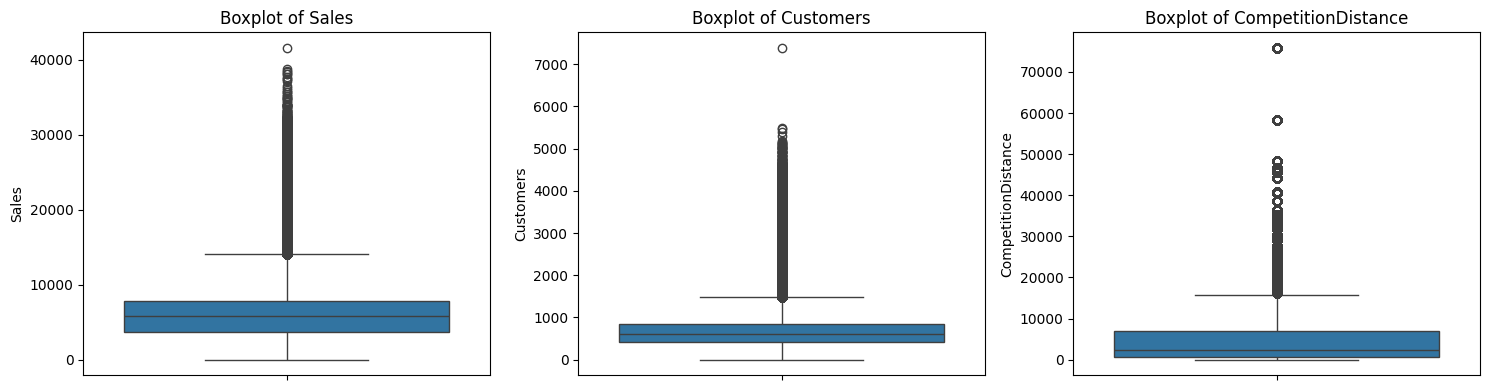

Outlier detection results:
None


In [20]:
# Define the variables for outlier detection
variables = ['Sales', 'Customers', 'CompetitionDistance']

# Check for outliers in the specified variables
outliers = process.check_outlier(variables)

# Print the results of the outlier detection
print("Outlier detection results:")
print(outliers)

## Summary of Outlier Detection

### Findings
- **Sales and Customers**: Both variables exhibit a similar pattern of outliers that are significantly higher than the main data clusters. These outliers may indicate days with unusually high sales or customer visits, likely due to promotions, holidays, or special events.
  
- **CompetitionDistance**: This variable shows outliers that are significantly distant from the main cluster, suggesting that some stores are exceptionally far from their nearest competitor.

### Handling Outliers
There are several approaches to manage outliers effectively:

1. **Trimming**: Remove outliers if they are genuine errors or if they do not contribute meaningfully to the analysis (e.g., data entry errors).

2. **Winsorizing**: Cap the outliers at a certain percentile (e.g., the 99th percentile) to limit the influence of extreme values.

3. **Transformation**: Apply transformations (e.g., logarithmic transformation) to reduce the impact of outliers and often normalize the data.

In [21]:
# Log the handling of outliers
logger.info('Handled Outliers')

# Log transformation example for 'CompetitionDistance'
train_data['CompetitionDistance_log'] = np.log1p(train_data['CompetitionDistance'])
print("Log transformation applied to 'CompetitionDistance'.")

# Winsorizing example for 'Sales' at the 95th percentile
train_data['Sales_winsorized'] = winsorize(train_data['Sales'], limits=[0, 0.05])
print("Winsorizing applied to 'Sales' at the 95th percentile.")

# Similarly Winsorizing for 'Customers'
train_data['Customers_winsorized'] = winsorize(train_data['Customers'], limits=[0, 0.05])
print("Winsorizing applied to 'Customers' at the 95th percentile.")

2025-01-11 16:52:26,602 - INFO - Handled Outliers


Log transformation applied to 'CompetitionDistance'.
Winsorizing applied to 'Sales' at the 95th percentile.
Winsorizing applied to 'Customers' at the 95th percentile.


## EDA-Exploratory Data Analysis

Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

In [22]:
# Log the import of the Visualyzer class
logger.info('Importing the Visualyzer class from data_visualization module')

# Import the Visualyzer class
from data_visualization import Visualyzer

# Create an instance of the Visualyzer class using training and test data
vlyr = Visualyzer(train_data, test_data)

# Print confirmation of the Visualyzer instance creation
print("Visualyzer instance created successfully.")

2025-01-11 16:52:26,734 - INFO - Importing the Visualyzer class from data_visualization module


Visualyzer instance created successfully.


2025-01-11 16:52:26,753 - INFO - Checking the distribution of promotions
2025-01-11 16:52:27,138 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:27,141 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:27,163 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:27,166 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:27,183 - INFO - Us

Promo Contingency Table:
 Dataset   Test   Train
Promo                 
0        24824  629129
1        16264  388080

Chi-square test for Promo: p-value = 4.882118480134891e-09
Promo2 Contingency Table:
 Dataset   Test   Train
Promo2                
0        17232  508031
1        23856  509178
Chi-square test for Promo2: p-value = 4.761154333295861e-222
Training Promo Distribution:
 Promo
0    0.618485
1    0.381515
Name: proportion, dtype: float64
Testing Promo Distribution:
 Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64
Training Promo2 Distribution:
 Promo2
1    0.500564
0    0.499436
Name: proportion, dtype: float64
Testing Promo2 Distribution:
 Promo2
1    0.580607
0    0.419393
Name: proportion, dtype: float64


2025-01-11 16:52:27,206 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


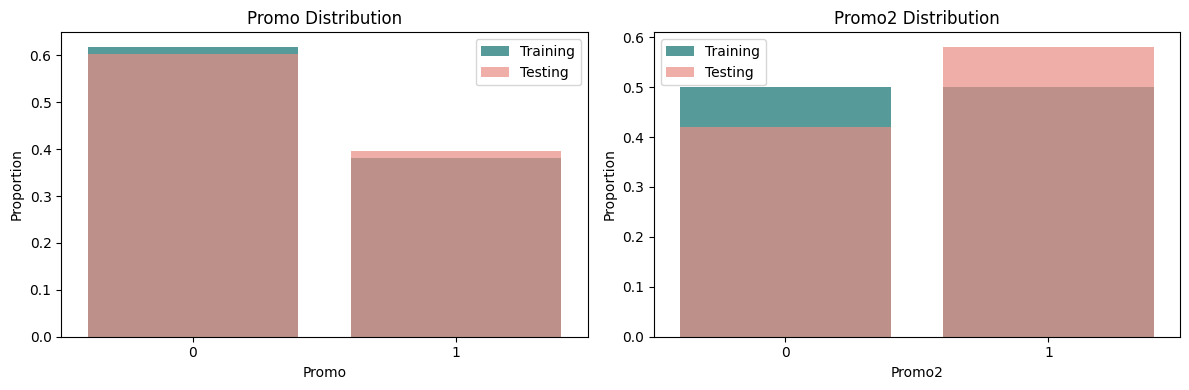

Promotion distribution checked successfully.


In [23]:
# Log the action of checking the distribution of promotions
logger.info('Checking the distribution of promotions')

# Check the distributions of promotions in the training and test data
vlyr.check_promotion_distribution()

# Print confirmation of the distribution check
print("Promotion distribution checked successfully.")

# Promotion Distribution Analysis

## Summary

### Promo
The distributions of one-time promotions (`Promo`) in both the training and testing sets are quite similar. This indicates that the data is balanced regarding these promotions.

### Promo2
There is a significant difference in the distributions of long-term promotions (`Promo2`). The training set shows a higher proportion of stores not participating in the promotion (`Promo2 = 0`), while the testing set has a higher proportion of participating stores (`Promo2 = 1`).

Check & compare sales behavior before, during, and after holidays

2025-01-11 16:52:27,383 - INFO - Comparing sales behavior


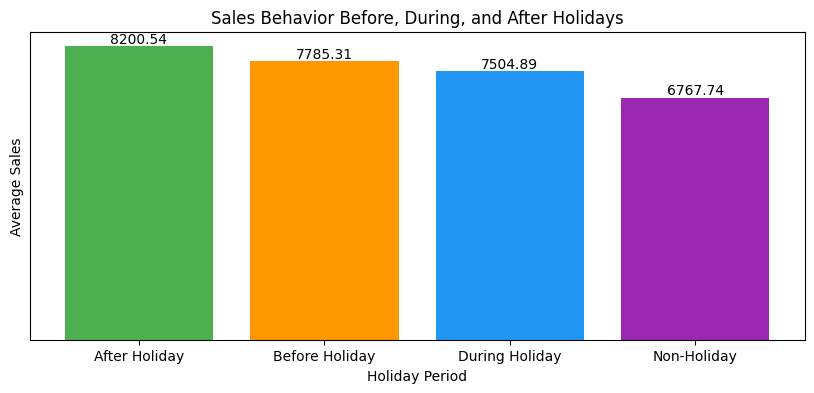

Sales behavior comparison completed successfully.


In [24]:
# Log the action of comparing sales behavior
logger.info('Comparing sales behavior')

# Compare sales behavior using the Visualyzer instance
vlyr.compare_sales_behavior()

# Print confirmation of the comparison
print("Sales behavior comparison completed successfully.")

## Summary

### Sales After Holidays
Sales are slightly higher after holidays compared to other periods. This could suggest increased shopping activity once stores re-open after holiday closures.

### Sales Before Holidays
Sales remain high before holidays, which might be due to customers preparing for the holiday period, stocking up on products in anticipation of closures or celebrations.

### Sales During Holidays
Sales during the holiday period are similar to those before and after, indicating that some stores remain open or there is sustained consumer activity during the holiday season.

### Sales on Non-Holidays
The average sales during non-holiday periods are noticeably lower than during holiday-related periods. This suggests that holidays have a strong positive impact on customer activity and sales.

Find out any seasonal (Christmas, Easter, etc) purchase behaviors

2025-01-11 16:52:28,184 - INFO - Finding seasonal sales behavior


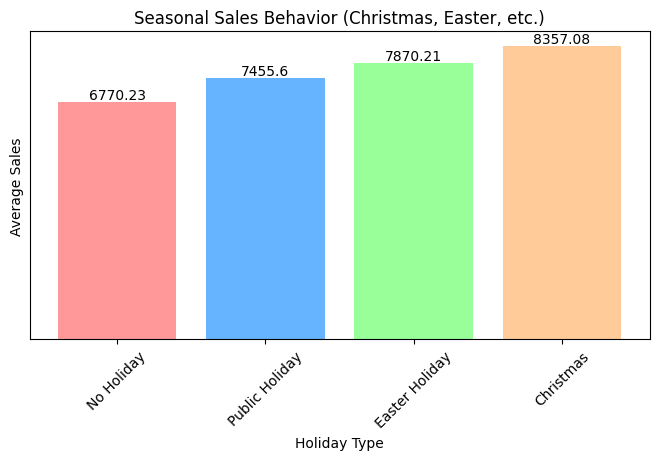

Seasonal sales behavior analysis completed successfully.


In [25]:
# Log the action of finding seasonal sales behavior
logger.info('Finding seasonal sales behavior')

# Find seasonal sales behavior using the Visualyzer instance
vlyr.seasonal_sales_behavior()

# Print confirmation of the seasonal sales behavior analysis
print("Seasonal sales behavior analysis completed successfully.")

## Summary

### Holiday Sales Insights
- **Easter and Christmas** have the highest average sales, indicating that customers tend to shop more during these holidays.
- **Public holidays** also show a significant increase in sales compared to regular days.
- **Non-holiday days** have the lowest average sales, which is expected since holidays generally drive more consumer spending.

What can you say about the correlation between sales and the number of customers?

2025-01-11 16:52:28,596 - INFO - Comparing the correlation between Sales and Customers


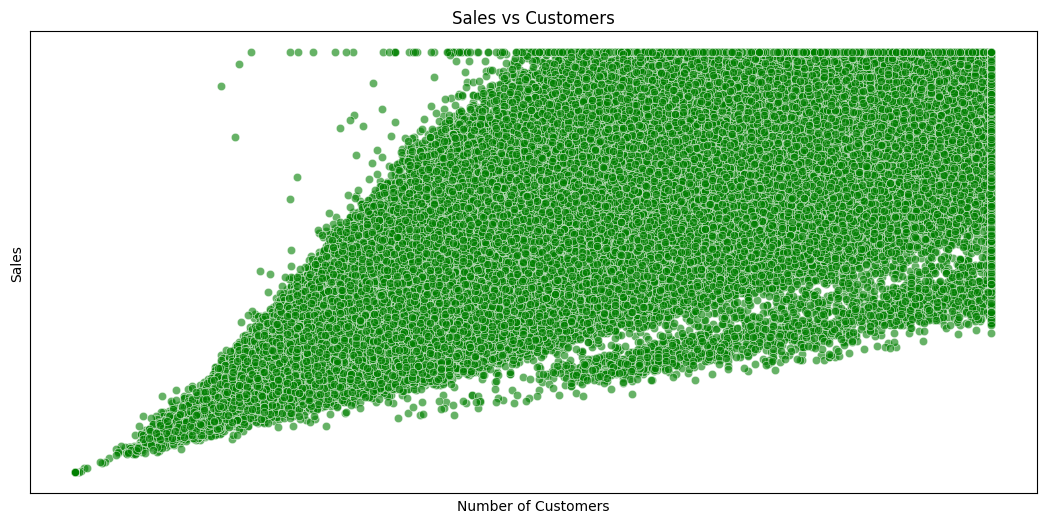

Correlation analysis between Sales and Customers visualized successfully.


In [26]:
# Log the action of comparing the correlation between Sales and Customers
logger.info('Comparing the correlation between Sales and Customers')

# Scatter plot to visualize Sales vs Customers
plt.figure(figsize=(13, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data, color='green', alpha=0.6)

# Add labels and title
plt.title('Sales vs Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')

# Remove tick numbers but keep labels
plt.xticks([])  # Remove x-axis tick numbers
plt.yticks([])  # Remove y-axis tick numbers

# Display the plot
plt.show()

# Print confirmation of the correlation analysis
print("Correlation analysis between Sales and Customers visualized successfully.")

## Summary

### Key Insights from Sales and Customers Correlation
- **Upward Trend**: Sales generally increase as the number of customers rises, as shown by the upward slope of the data points.
- **Clustering**: The data points cluster around a general upward trendline, suggesting a consistent relationship.
- **Outliers**: Although a few outliers deviate notably from the trend, they do not substantially impact the overall positive correlation.

**Analyze the Effect of Each Promo Type**

2025-01-11 16:52:30,565 - INFO - Analyzing the effect of each Promo type


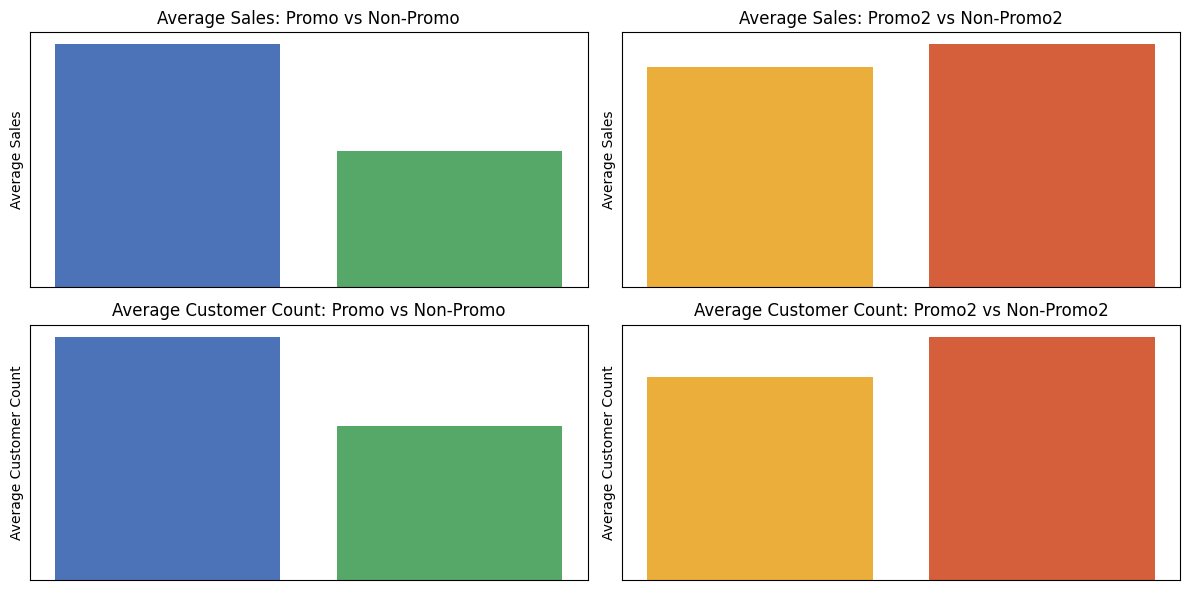

Promotion impact analysis plotted successfully.


In [27]:
# Log the action of analyzing the effect of each Promo type
logger.info('Analyzing the effect of each Promo type')

# Plot the average sales and customers for each promotion type
vlyr.plot_promo_impact()

# Print confirmation of the promotion impact analysis
print("Promotion impact analysis plotted successfully.")

## Summary

### Impact of Promotions on Sales
- **Promo**: Stores running promotions (Promo=1) see significantly higher sales compared to those not running promotions (Promo=0). This indicates that promotions effectively boost sales.
- **Promo2**: Stores with ongoing promotions (Promo2=1) have slightly lower sales than those without (Promo2=0). This suggests that long-term or consecutive promotions might be less effective, potentially due to diminishing returns over time.

### Impact of Promotions on Existing Customers
- **Promotional Effectiveness**: Both promotional types (Promo and Promo2) attract more customers, with Promo having a stronger impact. This shows that promotional activities are successful in increasing customer traffic.
- **Long-Term Promotions**: Although Promo2 continues to attract more customers, the increase is less pronounced compared to Promo. This indicates that while ongoing promotions still attract additional customers, their effectiveness may diminish over time.

Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

2025-01-11 16:52:31,291 - INFO - Identifying high impact stores in each promotion types
2025-01-11 16:52:31,640 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:31,641 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:31,646 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-11 16:52:31,648 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


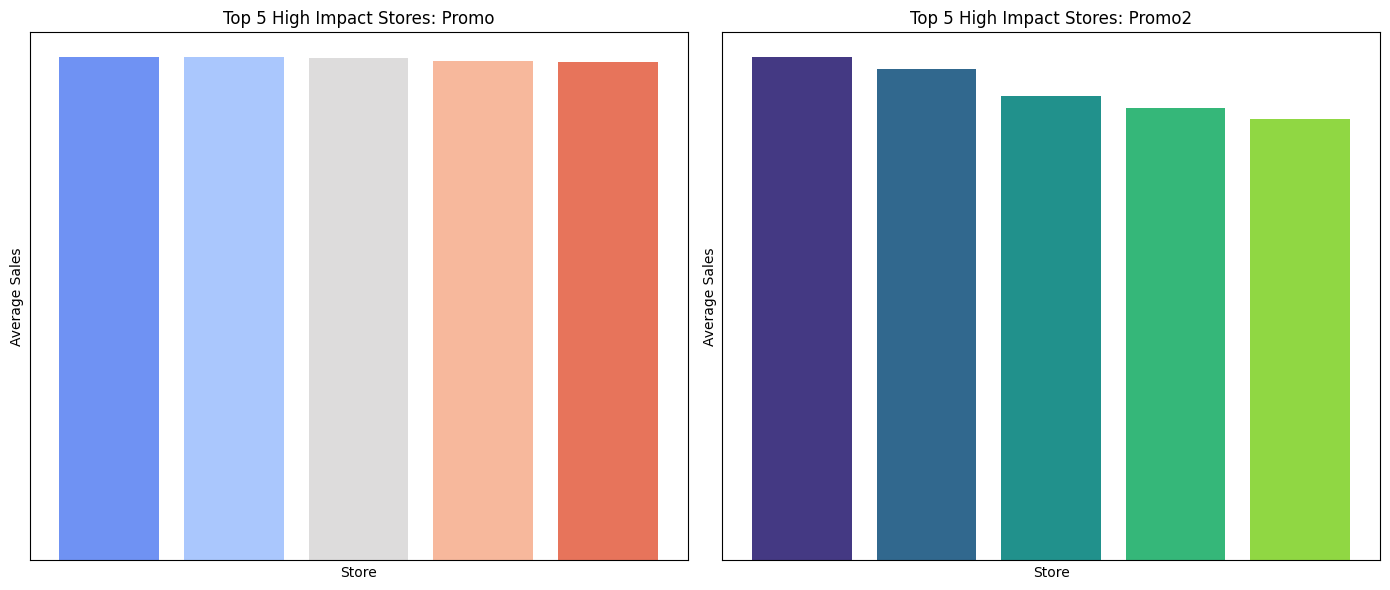

In [28]:
logger.info('Identifying high impact stores in each promotion types')
# Visualize highest Store Impact on Promotions
vlyr._high_impact_stores(top_n=5)

## Summary

### Impact of Promotions on Sales
- **Promo**: Stores like 817 and 1114 show the highest average sales and customer counts, indicating that single promotions significantly boost both metrics. Store 817, with an average of 24,679 in sales and over 3,000 customers, stands out as a top target for future promotions.
  
- **Promo2**: Continuous promotions (Promo2) have a smaller impact on sales, with Store 335 leading at 13,706 in sales. However, these stores still maintain strong customer counts, suggesting that Promo2 helps retain customers but may yield lower sales growth compared to single promotions.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

### **Comparison of Top High-Impact Stores: Promo vs Promo2**

In [29]:
# Log the action of comparing top high impact stores
logger.info('Comparing top high impact stores')

# Ensure 'Store', 'Promo', 'Promo2', 'Sales', and 'Customers' are present in the DataFrame
df = train_data.reset_index()
required_columns = {'Store', 'Promo', 'Promo2', 'Sales', 'Customers'}
if not required_columns.issubset(df.columns):
    raise KeyError(f"One or more required columns are missing: {required_columns}")

# Filter for stores with Promo active and calculate the mean Sales and Customers by store
promo_impact = df[df['Promo'] == 1][['Store', 'Sales', 'Customers']].groupby('Store').mean().reset_index()

# Filter for stores with Promo2 active and calculate the mean Sales and Customers by store
promo2_impact = df[df['Promo2'] == 1][['Store', 'Sales', 'Customers']].groupby('Store').mean().reset_index()

# Merge data for comparison
common_stores_comparison = pd.merge(promo_impact, promo2_impact, on='Store', suffixes=('_Promo', '_Promo2'))

# Print confirmation of the comparison data
print("Comparison of high impact stores for Promo and Promo2 has been successfully created.")

2025-01-11 16:52:31,728 - INFO - Comparing top high impact stores


Comparison of high impact stores for Promo and Promo2 has been successfully created.


In [30]:
common_stores_comparison.sort_values(by='Sales_Promo2', ascending=False).head(10)

,Store,Sales_Promo,Customers_Promo,Sales_Promo2,Customers_Promo2
171,335,12056.313889,1360.963889,10779.313163,1352.089172
396,769,11048.105556,1362.000000,10539.005308,1361.785563
391,756,11770.538889,1321.447222,9944.774947,1123.272824
196,380,11786.155556,1307.805556,9692.742038,1057.629512
280,544,11863.886111,1331.733333,9456.877919,1116.099788
416,820,11397.842657,1107.269231,9248.637203,890.459103
556,1092,11290.139860,1162.923077,9248.633245,952.391821
519,1027,11645.758741,1308.541958,9166.878628,1108.315303
277,539,11080.685315,1144.104895,8971.493404,935.624011
488,974,11387.776224,1304.430070,8943.187335,1101.100264


## Summary

### Impact of Promotions on Sales
- **Promo** drives higher sales compared to **Promo2**. For example, Store 335 and Store 756 see significantly better sales during Promo. Additionally, Promo tends to attract more customers in most cases than Promo2.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

Trends of customer behavior during store opening and closing times

2025-01-11 16:52:32,080 - INFO - Analyzing the trends of the customer behavior


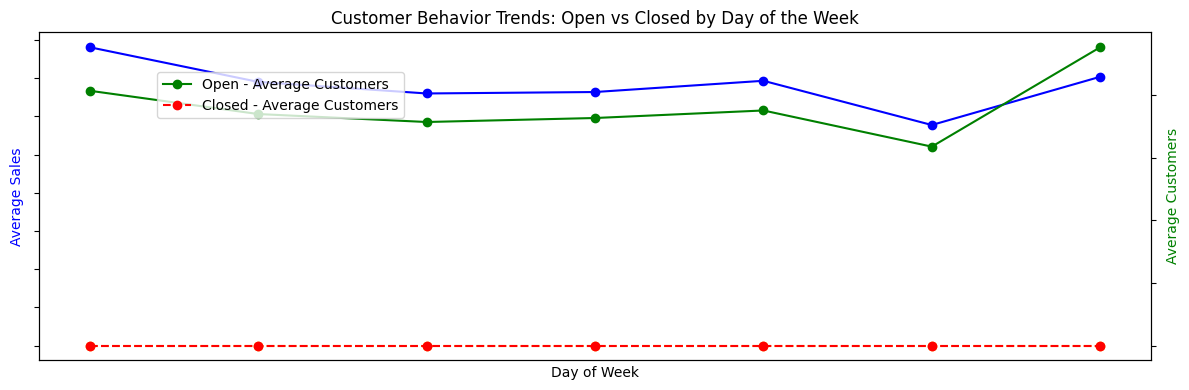

In [31]:
logger.info('Analyzing the trends of the customer behavior')
# Analyze trends of customer behavior
vlyr.analyze_trend()

## Summary

### Impact of Promotions on Sales
- **Promo** drives higher sales compared to **Promo2**. For example, Store 335 and Store 756 see significantly better sales during Promo. Additionally, Promo tends to attract more customers in most cases than Promo2.

## Trend Analysis Result

- The number of customers remains relatively stable during weekdays when the store is open.
- Sales show a slight decline through weekdays but drop notably on the last weekday (Day 5). However, there is a significant increase in both customer numbers and sales from the weekend days (Day 6-7).
  
### Closed Times:
- Both customer numbers and sales remain constant at zero when the store is closed, as expected.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

Which stores are open on all weekdays? How does that affect their sales on weekends?

In [32]:
# Ensure you have the correct DataFrame and reset index if 'Store' is the index
data = train_data.copy()  # Use your actual DataFrame
data = data.reset_index()  # Ensure 'Store' is a column, not the index

# Filter stores open on weekdays (Monday to Friday)
weekday_open_stores = data[(data['DayOfWeek'] <= 5) & (data['Open'] == 1)]

# Count the number of unique weekdays each store is open
open_weekday_counts = weekday_open_stores.groupby('Store')['DayOfWeek'].nunique()

# Identify stores that are open on all weekdays (5 days)
open_all_weekdays = open_weekday_counts[open_weekday_counts == 5].index

# Calculate average weekend sales for stores open all weekdays
weekend_sales_summary = data[(data['Store'].isin(open_all_weekdays)) & (data['DayOfWeek'] >= 6)] \
    .groupby('Store')['Sales'].mean()

# Calculate average weekday sales for the same stores
weekday_sales_summary = data[(data['Store'].isin(open_all_weekdays)) & (data['DayOfWeek'] <= 5)] \
    .groupby('Store')['Sales'].mean()

# Create a DataFrame comparing average weekday and weekend sales
comparison = pd.DataFrame({
    'Weekday Sales': weekday_sales_summary,
    'Weekend Sales': weekend_sales_summary
})

# Sort the comparison DataFrame and display it
comparison_sorted = comparison.sort_values(by='Weekday Sales', ascending=False)
display(comparison_sorted)

,Weekday Sales,Weekend Sales
Store,,
262,12137.000000,12137.000000
562,12125.913947,12124.018657
733,12099.090504,12075.880597
335,11710.790801,8436.716418
788,11698.353116,6066.723881
...,...,...
794,3076.216617,1238.820896
543,2914.200297,802.671642
307,2869.813056,671.895522


2025-01-11 16:52:33,064 - INFO - Visualizing which stores are open on all weekdays


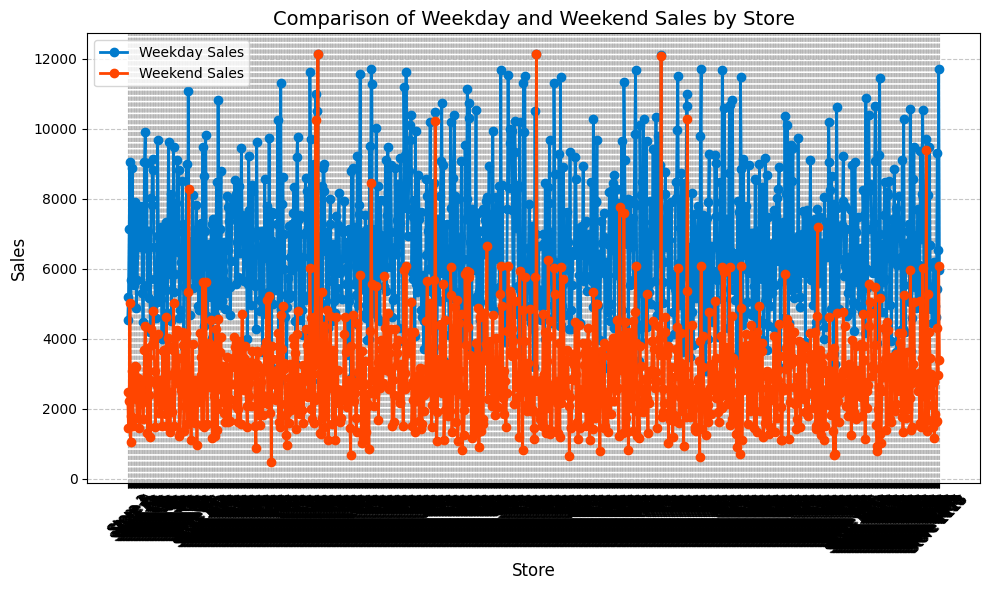

In [33]:
logger.info('Visualizing which stores are open on all weekdays')

# Visualize the comparison for better understanding
plt.figure(figsize=(10, 6))

# Plot lines for weekday and weekend sales with more attractive colors
sales_comparison = comparison.copy()
plt.plot(sales_comparison.index, sales_comparison['Weekday Sales'], 
         marker='o', label='Weekday Sales', color='#007acc', linewidth=2)
plt.plot(sales_comparison.index, sales_comparison['Weekend Sales'], 
         marker='o', label='Weekend Sales', color='#ff4500', linewidth=2)

# Labels and formatting
plt.xlabel('Store', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.title('Comparison of Weekday and Weekend Sales by Store', fontsize=14)
plt.xticks(sales_comparison.index, ['Store ' + str(i) for i in sales_comparison.index], rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)  # Adding grid for better readability
plt.legend()
plt.tight_layout()
plt.show()

markdown

Copy
# Sales Behavior Analysis

## Summary

### Higher Weekday Sales Correlate with Higher Weekend Sales
- Stores with higher sales during weekdays tend to also have higher sales on weekends.

## Sales Trend
- There seems to be a pattern where stores that perform better during the weekdays also perform better on weekends. This suggests that strong weekday performance may contribute to better weekend sales.

## Impact of Promotions on Sales
- **Promo** drives higher sales compared to **Promo2**. For example, Store 335 and Store 756 see significantly better sales during Promo. Additionally, Promo tends to attract more customers in most cases than Promo2.

## Trend Analysis Result
- The number of customers remains relatively stable during weekdays when the store is open.
- Sales show a slight decline through weekdays but drop notably on the last weekday (Day 5). However, there is a significant increase in both customer numbers and sales from the weekend days (Day 6-7).

### Closed Times
- Both customer numbers and sales remain constant at zero when the store is closed, as expected.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

Check how the assortment type affects sales

2025-01-11 16:52:36,703 - INFO - Visualizing the sales by assortemnt type


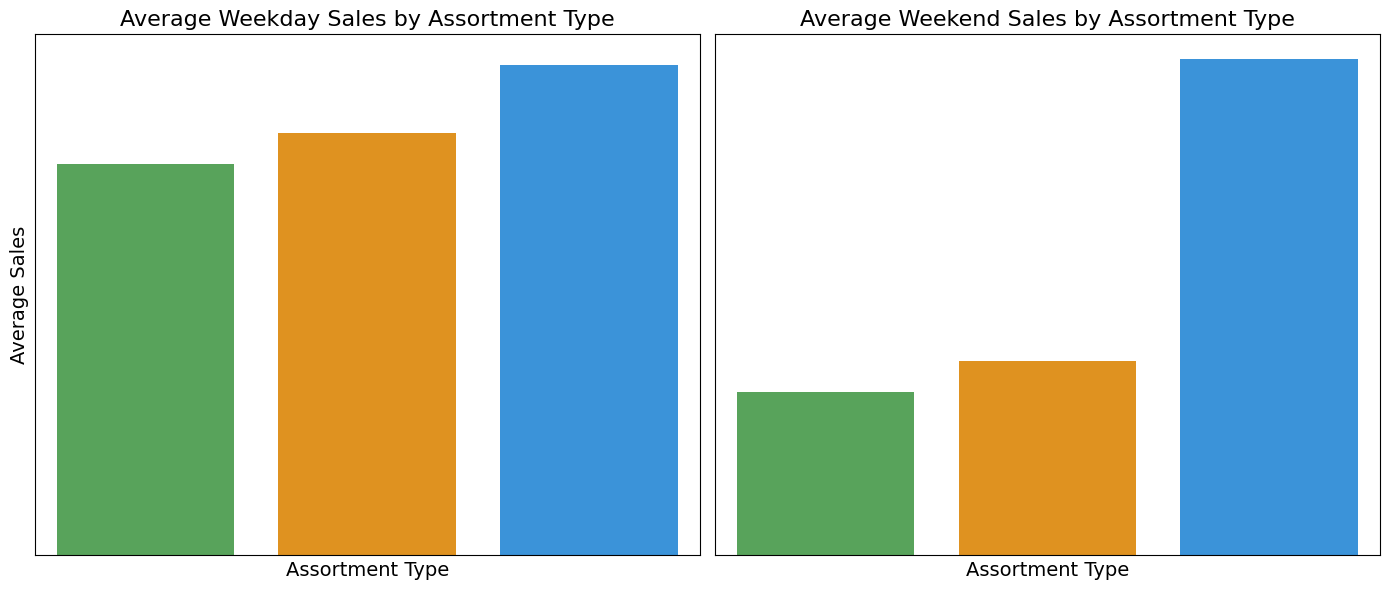

In [34]:
logger.info('Visualizing the sales by assortemnt type')
# Visualize the sales by assortment
vlyr.plot_assortment_sales()

## Summary

### Weekday Sales
- Extended and Extra assortment types have consistently higher average weekday sales compared to the Basic assortment type.
- The Extra assortment type has the highest average weekday sales, suggesting that it attracts customers with higher spending power or a demand for a wider range of products.

### Weekend Sales
- The Extra assortment type again shows the highest average weekend sales. However, the difference between Extended and Basic is less pronounced on weekends, indicating that the impact of assortment type might be less significant during this period.

## Sales Trend
- There seems to be a pattern where stores that perform better during the weekdays also perform better on weekends. This suggests that strong weekday performance may contribute to better weekend sales.

## Impact of Promotions on Sales
- **Promo** drives higher sales compared to **Promo2**. For example, Store 335 and Store 756 see significantly better sales during Promo. Additionally, Promo tends to attract more customers in most cases than Promo2.

## Trend Analysis Result
- The number of customers remains relatively stable during weekdays when the store is open.
- Sales show a slight decline through weekdays but drop notably on the last weekday (Day 5). However, there is a significant increase in both customer numbers and sales from the weekend days (Day 6-7).

### Closed Times
- Both customer numbers and sales remain constant at zero when the store is closed, as expected.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

### Research Questions
- How does the distance to the next competitor affect sales?
- If the store and its competitors are all in city centers, does the distance still matter?

### Steps for Analysis

1. **Plot Sales vs. Competition Distance**: Create a scatter plot to visualize the relationship between sales and the distance to the nearest competitor.

2. **Group Stores into Distance Bins**: Categorize stores into bins based on their competition distance and compare average sales across these bins.

3. **City Center Filters**: If possible, add filters for city center locations and rerun the analysis to determine if the effect of competition distance changes.

4. **Explore Interactions**: Investigate how competition distance interacts with other variables such as Promo, StateHoliday, SchoolHoliday, StoreType, and Assortment.

## Sales Trend
- There seems to be a pattern where stores that perform better during the weekdays also perform better on weekends. This suggests that strong weekday performance may contribute to better weekend sales.

## Impact of Promotions on Sales
- **Promo** drives higher sales compared to **Promo2**. For example, Store 335 and Store 756 see significantly better sales during Promo. Additionally, Promo tends to attract more customers in most cases than Promo2.

## Trend Analysis Result
- The number of customers remains relatively stable during weekdays when the store is open.
- Sales show a slight decline through weekdays but drop notably on the last weekday (Day 5). However, there is a significant increase in both customer numbers and sales from the weekend days (Day 6-7).

### Closed Times
- Both customer numbers and sales remain constant at zero when the store is closed, as expected.

### Visualizations
- High-impact stores for both single and continuous promotions were identified and visualized, highlighting their performance in terms of average sales and customer counts.

2025-01-11 16:52:37,237 - INFO - Understanding sales vs. competition distance


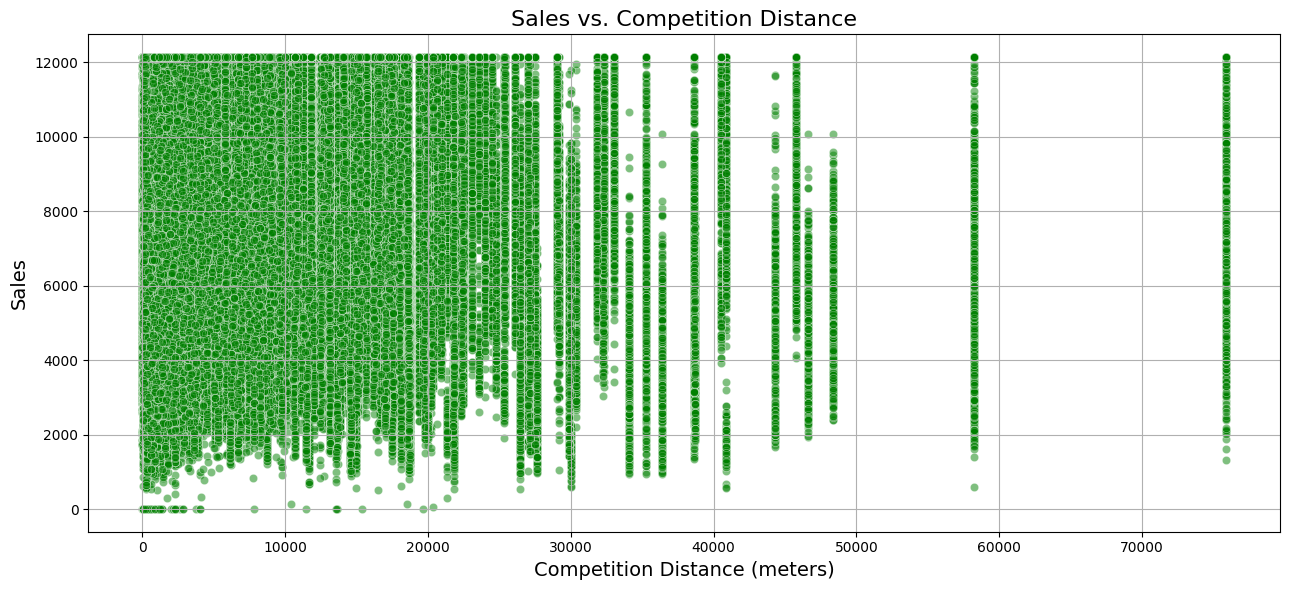

In [35]:
logger.info('Understanding sales vs. competition distance')

# Filter the data to include only stores that are open
df = train_data[train_data['Open'] == 1]

# Create a scatter plot for Sales vs CompetitionDistance
plt.figure(figsize=(13, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df, alpha=0.5, color='green')

# Enhance the plot with titles and labels
plt.title('Sales vs. Competition Distance', fontsize=16)
plt.xlabel('Competition Distance (meters)', fontsize=14)
plt.ylabel('Sales', fontsize=14)
plt.grid(True)  # Add grid for better readability

# Display the plot
plt.tight_layout()
plt.show()

Grouping Stores by Distance

2025-01-11 16:52:39,080 - INFO - Grouping sales by distance
C:\Users\amenz\AppData\Local\Temp\ipykernel_23300\1540512369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'DistanceBin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)


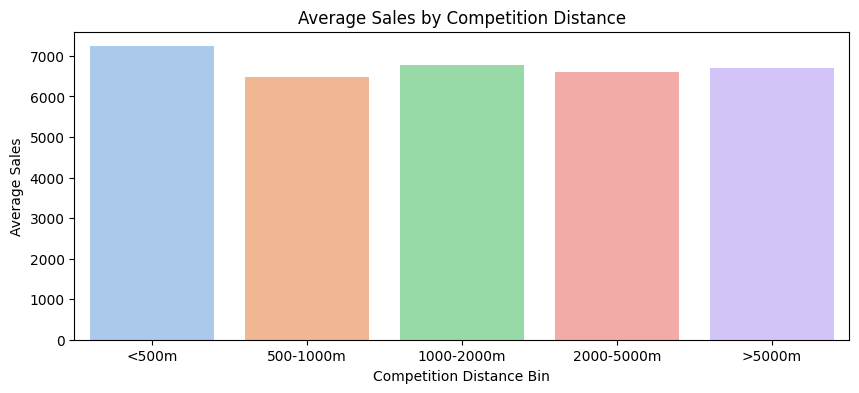

In [36]:
logger.info('Grouping sales by distance')
# Create bins for CompetitionDistance
bins = [0, 500, 1000, 2000, 5000, df['CompetitionDistance'].max()]
labels = ['<500m', '500-1000m', '1000-2000m', '2000-5000m', '>5000m']
df.loc[:,'DistanceBin'] = pd.cut(df['CompetitionDistance'], bins=bins, labels=labels, include_lowest=True)

# Group by DistanceBin and calculate the mean Sales
distance_sales = df.groupby('DistanceBin', observed=False)['Sales'].mean().reset_index()

# Bar plot: Average Sales by Distance Bin
plt.figure(figsize=(10,4))
sns.barplot(x='DistanceBin', y='Sales', hue='DistanceBin', data=distance_sales, palette='pastel')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance Bin')
plt.ylabel('Average Sales')
plt.show()

**City Center Analysis**

2025-01-11 16:52:39,243 - INFO - Identifying the city center
C:\Users\amenz\AppData\Local\Temp\ipykernel_23300\2978349094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'CityCenter'] = df['CompetitionDistance'] < 500


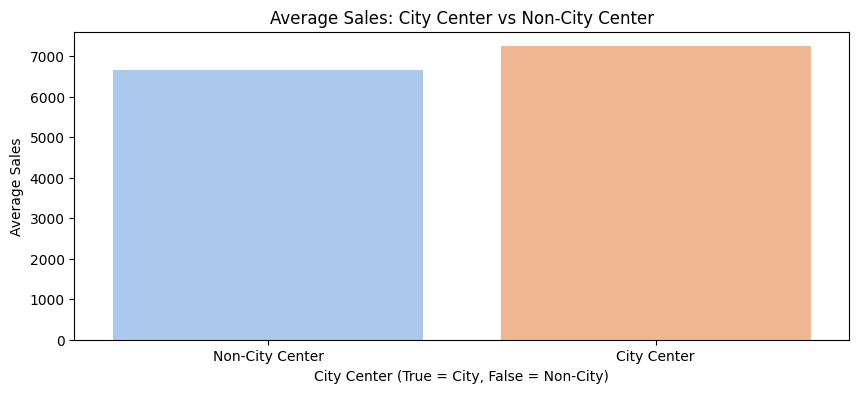

In [37]:
logger.info('Identifying the city center')
# Create a flag for city center stores (CompetitionDistance < 500 meters)
df.loc[:,'CityCenter'] = df['CompetitionDistance'] < 500

# Compare sales for stores in city centers vs non-city centers
city_vs_non_city = df.groupby('CityCenter')['Sales'].mean().reset_index()

# Bar plot: Average Sales in City Center vs Non-City Center
plt.figure(figsize=(10,4))
sns.barplot(x='CityCenter', y='Sales', hue='CityCenter', legend=False, data=city_vs_non_city, palette='pastel')
plt.title('Average Sales: City Center vs Non-City Center')
plt.xlabel('City Center (True = City, False = Non-City)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Non-City Center', 'City Center'])
plt.show()

## Key Insights

- **Proximity to Competitors:** Stores located near competitors (within <500m) significantly outperform others in sales. This is likely due to increased customer foot traffic and their strategic placement in busy areas, such as city centers.

- **Mid-Range Competition Benefits:** Stores situated in moderately competitive zones (1000-2000m) also exhibit slightly higher-than-average sales. This suggests that these locations effectively attract customers from a broader range of nearby options.

- **Impact of Location:** City-center stores demonstrate notably higher average sales compared to those located outside city centers. This underscores the critical role of location in driving foot traffic and shaping competitive dynamics.

**Interaction with Promotions**

d:\KAIM\KAIM-week-5\Rossmann-Sales-Prediction\RossmanSales\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


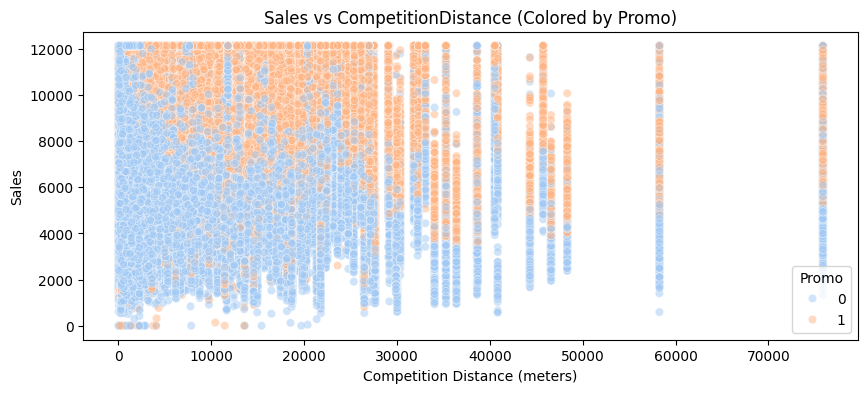

In [38]:
logging.getLogger().setLevel(logging.WARNING)  # Set to WARNING to suppress INFO messages

# Plot the effect of CompetitionDistance on Sales, colored by Promo
plt.figure(figsize=(10, 4))
sns.scatterplot(x='CompetitionDistance', y='Sales', hue='Promo', data=df, alpha=0.5, palette='pastel')
plt.title('Sales vs CompetitionDistance (Colored by Promo)')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.legend(title='Promo')
plt.show()

## Impact of Competitor Openings on Stores

### Objective
To analyze how the opening or reopening of new competitors affects stores, particularly focusing on those with initially missing competitor distance values (NA) that later receive valid distances.

### Steps for Analysis

1. **Filter the Data:**
   - Identify stores where `CompetitionDistance` is NA.
   - Check for subsequent entries where this field has valid values.

2. **Analyze Sales Performance:**
   - Compare sales performance before and after the distance to competitors becomes available.

3. **Summarize Findings:**
   - Look for trends, such as changes in sales, customer counts, or any patterns indicating the impact of nearby competitors.

In [39]:
logger.info('Analyzing the stores before and after opening')

# Step 1: Ensure the 'CompetitionDistance' and 'CompetitionOpenSinceMonth/Year' columns are properly set
data = train_data.reset_index()

# Step 2: Filter stores with initially missing CompetitionDistance (implying no competitor initially)
stores_with_missing_competition = missing_competition.reset_index()

# Step 3: Get unique stores with missing competition distance
unique_stores_with_na = stores_with_missing_competition['Store'].unique()

# Step 4: Check for subsequent entries of these stores where CompetitionDistance becomes non-NA
stores_with_competition_appeared = data[
    (data['Store'].isin(unique_stores_with_na)) & 
    (data['CompetitionDistance'].notna()) & 
    (data['CompetitionOpenSinceMonth'].notna()) & 
    (data['CompetitionOpenSinceYear'].notna())
]

# Step 5: Compare sales before and after the competitor opening (based on CompetitionOpenSinceMonth/Year)
before_after_analysis = []

for store in unique_stores_with_na:
    # Get the data for this store
    store_data = data[data['Store'] == store].copy()
    
    # Find the first entry where the competitor opened (non-NA CompetitionDistance)
    first_valid_competition_entry = store_data[store_data['CompetitionDistance'].notna()].index.min()
    
    # Ensure CompetitionOpenSinceMonth/Year is present to track when the competitor opened
    if first_valid_competition_entry is not None:  # Check for None instead of pd.notna
        competition_open_date = store_data.loc[first_valid_competition_entry, ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']]
        
        # Calculate sales before and after the competitor opening
        if first_valid_competition_entry > 0:  # Ensure there are sales before the competitor opened
            before_competition_sales = store_data.loc[:first_valid_competition_entry - 1, 'Sales'].mean()
        else:
            before_competition_sales = 0  # No sales data before competitor opened
        
        after_competition_sales = store_data.loc[first_valid_competition_entry:, 'Sales'].mean()
        
        # Append results to the list
        before_after_analysis.append({
            'Store': store,
            'Before Competitor (Sales)': before_competition_sales,
            'After Competitor (Sales)': after_competition_sales
        })

# Convert the list to a DataFrame
before_after_analysis_df = pd.DataFrame(before_after_analysis)

# Step 6: Display the analysis of sales before and after competitor appearance
display(before_after_analysis_df)

,Store,Before Competitor (Sales),After Competitor (Sales)
0,291,NaN,6528.213376
1,622,NaN,3593.717622
2,879,NaN,3087.831135


## Key Findings

### Sales Before Competitor Presence
For the stores analyzed (Store 291, Store 622, and Store 879), there were no sales data available prior to the competitors' opening, as indicated by the NaN values. This suggests that these stores may have been newly established or that their sales data was not captured before the competitors became relevant.

### Sales After Competitor Opening
- **Store 291:** Recorded an average sales figure of **6643.28** after the competitor opened.
- **Store 622:** Showed average sales of **3593.72**.
- **Store 879:** Achieved average sales of **3087.83**.

In [40]:
# Save both the test and train data to CSV for preprocessing
train_data.to_csv('../data/train_cleaned.csv', index=False)
print("Training data has been saved to '../data/train_cleaned.csv'.")

test_data.to_csv('../data/test_cleaned.csv', index=False)
print("Test data has been saved to '../data/test_cleaned.csv'.")

Training data has been saved to '../data/train_cleaned.csv'.
Test data has been saved to '../data/test_cleaned.csv'.
